In [4]:
# First, install MNE
!pip install mne

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [8]:
import mne
import os
from scipy.io import loadmat

# Available files
# 'train_S002_night1_hackathon_raw.mat'
# 'train_S003_night5_hackathon_raw.mat'
# 'test_S004_night3_hackathon_raw.mat'

mat_file_path = '../dataset_phase1_ntx23/' + 'train_S002_night1_hackathon_raw.mat'

# Load the .mat file using scipy
mat = loadmat(mat_file_path)

# Extract EEG data
eeg_data = mat['EEG'][0, 0]['data']

# Create an MNE Info object, necessary to create RawArray
info = mne.create_info(ch_names=['EEG1'], sfreq=250, ch_types=['eeg'])

print(info)
print()
print(info.keys())
print()
print(info["ch_names"])

<Info | 7 non-empty values
 bads: []
 ch_names: EEG1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

['EEG1']


In [9]:
# Create the RawArray object
raw = mne.io.RawArray(eeg_data, info)

print()
print(raw)
print()
print(raw.info)

Creating RawArray with float64 data, n_channels=1, n_times=4965399
    Range : 0 ... 4965398 =      0.000 ... 19861.592 secs
Ready.
<RawArray | 1 x 4965399 (19861.6 s), ~37.9 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/pn/s1ll87dd4vx41fmwssbn2xm80000gn/T/ipykernel_25333/2635844998.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
/opt/homebrew/lib/python3.9/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


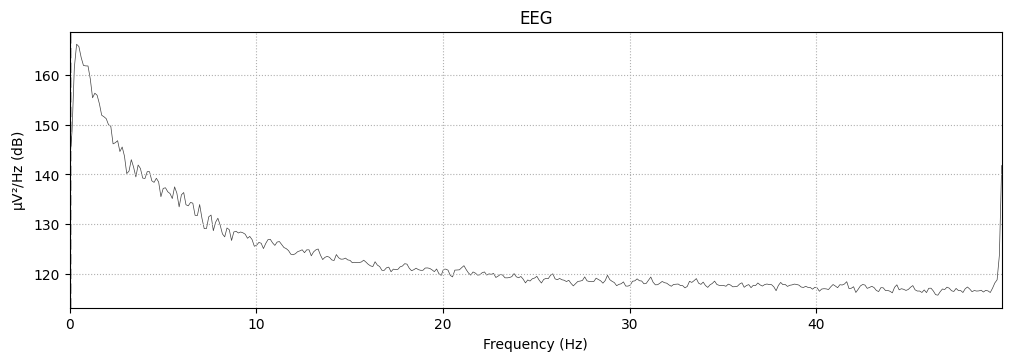

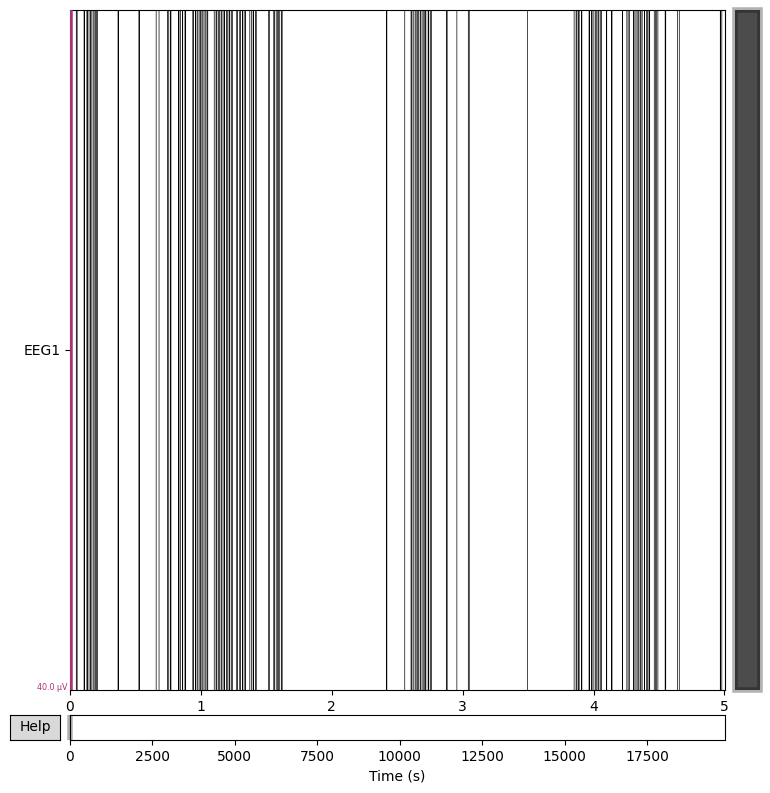

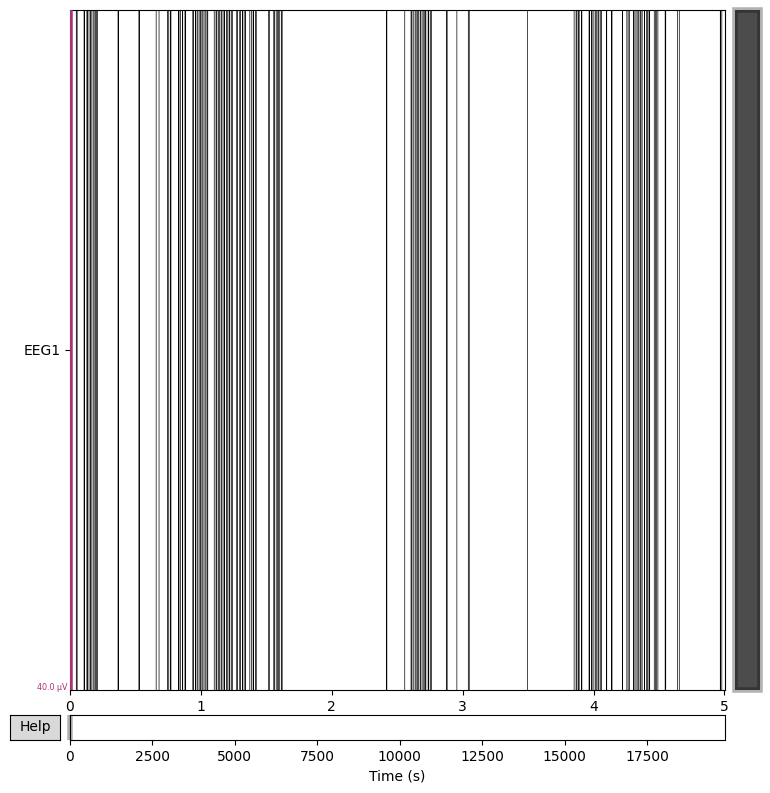

In [11]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=30)